In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv("한국문화컨텐츠 소비 비중정보.csv")

In [3]:
data

,IEM_NM,ALL_TOTAL_CO,MALE_RATE,FEMALE_RATE,ALL_N10S_RATE,ALL_N20S_RATE,ALL_N30S_RATE,ALL_N40S_RATE,ALL_N50S_RATE,REPRT_YEAR_CN,EXAMIN_COUNTRY_NM,CNTNTS_URL
0,한국 문화콘텐츠 소비(시간),18.18,16.65,19.69,22.03,20.68,13.26,13.44,19.87,2021,중국,드라마
1,소비 비중(%),29.37,27.92,30.80,29.99,31.80,26.40,28.36,30.91,2021,중국,드라마
2,월평균 지출 금액($),7.46,8.12,6.82,6.08,7.14,6.42,5.46,20.56,2021,중국,드라마
3,한국 문화콘텐츠 소비(시간),13.29,11.76,14.76,14.25,13.65,13.17,8.31,15.45,2021,중국,예능
4,소비 비중(%),28.46,25.52,31.29,24.85,27.79,28.91,30.65,37.55,2021,중국,예능
...,...,...,...,...,...,...,...,...,...,...,...,...
2593,월평균 지출 금액($),8.54,8.50,8.57,8.80,9.11,8.48,8.55,7.02,2021,아르헨티나,패션
2594,소비 비중(%),18.67,20.35,18.02,17.82,21.56,18.71,13.50,13.00,2021,아르헨티나,뷰티
2595,월평균 지출 금액($),8.41,9.01,8.17,9.34,7.66,9.86,7.42,4.96,2021,아르헨티나,뷰티
2596,소비 비중(%),13.27,13.58,12.95,15.45,16.47,9.63,12.19,11.07,2021,아르헨티나,음식


In [4]:
data=data[data["REPRT_YEAR_CN"]=="2021"]
data=data[data["IEM_NM"]=="월평균 지출 금액($)"]
data=data[["EXAMIN_COUNTRY_NM","CNTNTS_URL","ALL_TOTAL_CO","MALE_RATE","FEMALE_RATE"]]
data

,EXAMIN_COUNTRY_NM,CNTNTS_URL,ALL_TOTAL_CO,MALE_RATE,FEMALE_RATE
2,중국,드라마,7.46,8.12,6.82
5,중국,예능,7.68,8.26,7.13
11,중국,음악,12.32,15.28,9.39
14,중국,애니메이션,17.05,15.64,18.19
17,중국,웹툰,14.11,13.76,14.38
...,...,...,...,...,...
2588,아르헨티나,도서,3.45,3.40,3.50
2591,아르헨티나,게임,4.81,5.07,4.36
2593,아르헨티나,패션,8.54,8.50,8.57
2595,아르헨티나,뷰티,8.41,9.01,8.17


In [5]:
import matplotlib as mpl
mpl.rcParams['font.family']='NanumGothic'

C:\Anaconda3\envs\statenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\envs\statenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\envs\statenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


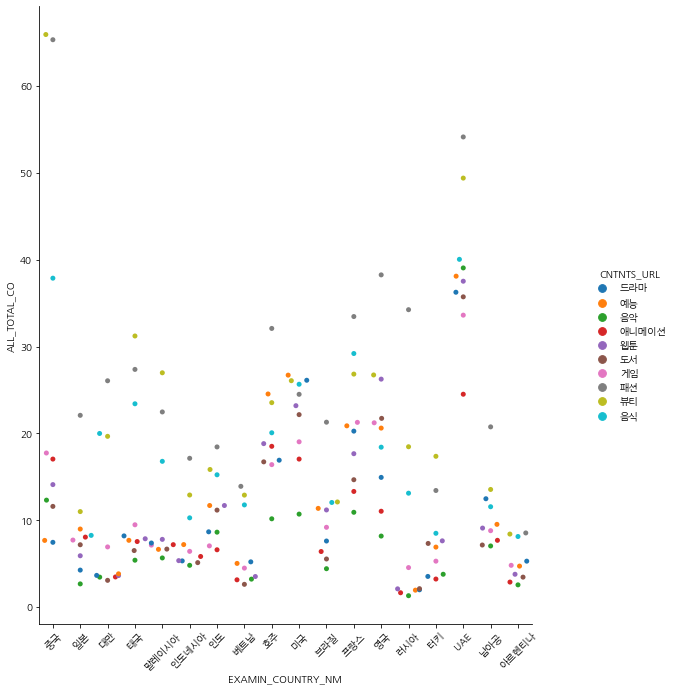

In [6]:
fig=sns.catplot(x="EXAMIN_COUNTRY_NM", y="ALL_TOTAL_CO", hue="CNTNTS_URL", data=data, kind="swarm")
fig.fig.set_size_inches(10,10)
plt.xticks(rotation=45)
plt.show()

#가장 k-컨텐츠를 많이 소비하는 나라를 확인하기 위해 2021년 기준 월평균지출금액을 y축의 값으로 설정하여 plot을 그려봄
#월평균지출금액에 따른 나라별 차이를 확인해보니 중국이 다른 나라에 비해 압도적으로 k-컨텐츠 관련 소비량이 많은 것을 확인할 수 있음

In [7]:
data=pd.read_csv("한국문화컨텐츠 소비 비중정보.csv")

In [8]:
#중국에서 가장 인기있는 k-컨텐츠가 무엇인지 파악함
data=data[data["IEM_NM"]=="한국 문화콘텐츠 소비(시간)"]
data=data[data["EXAMIN_COUNTRY_NM"]=="중국"]
data=data[["CNTNTS_URL","ALL_TOTAL_CO","MALE_RATE","FEMALE_RATE","REPRT_YEAR_CN"]]
data_2019=data[data["REPRT_YEAR_CN"]=="2019"]
data_2021=data[data["REPRT_YEAR_CN"]=="2021"]
data_2020=data[data["REPRT_YEAR_CN"]=="2020"]

In [9]:
#k-컨텐츠의 분야 중 중국인의 관심이 다른 년도에 비해 크게 증가한 것이 있는지를 확인하기 위해 ANOVA test를 해주었다.
#만약 ANOVA test의 결과상으로 k-컨텐츠의 분야 중 중국인의 관심이 다른 년도에 비해 크게 증가한 것이 있다고 파악이 되면, 해당 컨텐츠도 고려하여 관광산업을 생각하기 위해서이다

#년도별로 비교하여 k-컨텐츠의 소비시간 차이가 있는지를 확인하기 위해 ANOVA test를 해줌
from scipy.stats import f_oneway
f_oneway(data_2021["ALL_TOTAL_CO"],data_2020["ALL_TOTAL_CO"],data_2019["ALL_TOTAL_CO"])

#ANOVA test를 해보았을 때, pvalue 값이 0.05보다 작으므로 년도별로 비교해봤을 때 컨텐츠의 소비시간의 차이는 크게 없는 것을 확인할 수 있다
#따라서 가장 큰 폭으로 소비시간의 차이가 발생한 컨텐츠는 고려하지 않고, 2021년을 기준으로 하였을 때, 중국인이 가장 많이 소비한 k-컨텐츠를 plot을 그려 확인한다

F_onewayResult(statistic=0.8205011883406474, pvalue=0.4579033211261087)